# Hochschule Bonn-Rhein-Sieg

# Mathematics for Robotics and Control, WS17

# Assignment 1 - Frames

This week's assignment is about frames of reference. As you have learned in the lecture, the concept of frames is of great importance in robotics.

Let us consider a mobile robot (e.g. a youBot) that delivers packages in a lab. The robot is equipped with several sensors, including a camera for perceiving its environment and a gripper for grasping objects. You will use your knowledge of frames to help our robot complete its tasks.

Let us first setup this notebook so that figures and plots can be shown in the notebook page. Once you run the following cell, you don't have to import any of the packages in the subsequent code cells, as they will be available to all of them.

In [1]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize, getfigs

---

**Hint**: You might want to check the the NumPy manual [1] before you start. In particular, read and understand the following functions:

```
array()
asarray()
sin()
cos()
tan()
radians()
hstack()
vstack()
dot()
delete()
linalg.inv()
linalg.det()
```

[1] http://docs.scipy.org/doc/numpy/genindex.html


## Picking up a package for the lab [50 points]

The robot's task for today is to go to the reception and pick up a package that is lying on a cabinet. To do so, the robot has to complete a few subtasks.

### Locate the pose of the reception's door relative to the robot's base frame [25 points]

Assume that our robot is located in a hallway that leads to the reception. In order to go inside the reception, the robot needs to know the pose of the door $\{D\}$ relative to the base frame $\{B \}$, i.e. we need the transform ${}^{B}_DT$; however, we are given the pose of the door relative to the camera's frame $\{C\}$, as we are using a camera for detecting the reception's door.

With respect to the camera, the door frame $\{D\}$ is rotated $-13.215^o$ about $Z$ and $-28.647^o$ about $Y$ (this a rotation about $Z$ first, followed by a rotation in $Y$  using the *Z-Y-X*-Euler-angle convention) and has a relative translation of $(1.533, -0.354, 0.197)$ meters in $X,Y$, and $Z$ respectively. We also know the pose of the camera relative to the base, $^{B}_CT$: $\{C\}$ is located $(-0.176, 0.035, 0.563)$ meters away from the base frame and is rotated $28.647^o$ about $\{B\}$'s $Y$ axis.

Observe the following figure for a visual description of the frames. The $X$ axis is represented by the red line, the $Y$ axis by the green line, and the $Z$ axis by the blue line.

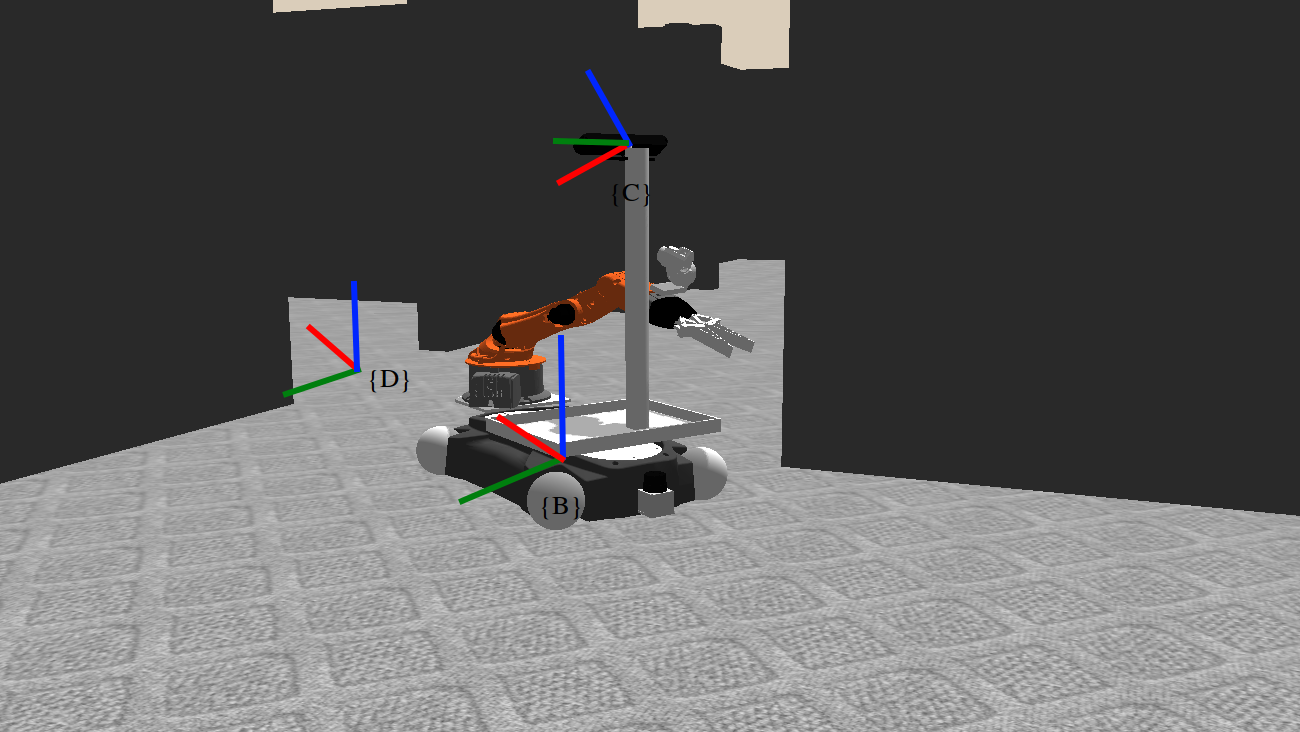

In [2]:
import IPython
IPython.core.display.Image("images/youbot_and_door.png", embed=True)

Calculate $^{B}_DT$ by completing the following function.

In [3]:
def get_rotation_matrix_z_axis(theta):
#rotation matrix for rotation about the z axis by theta
        
    A_B_R = np.array([[np.cos(theta),-np.sin(theta),0.],
                     [np.sin(theta),np.cos(theta),0.],
                     [0.,0.,1.]])
    return A_B_R

def get_rotation_matrix_y_axis(theta):
#rotation matrix for rotation about the y axis by theta
    
    A_B_R = np.array ([[np.cos(theta),0.,np.sin(theta)],
                      [0.,1.,0.],
                      [-np.sin(theta),0.,np.cos(theta)]])
    return A_B_R

def direct_transform():
    
    A = get_rotation_matrix_z_axis(np.radians(-13.215))
    B = get_rotation_matrix_y_axis(np.radians(-28.647))

#final matrix after rotation about z and y from c to D

    rotation_matrix = B.dot(A)
    #print "Transformation from C to B"
    #print rotation_matrix
    
#print rotation_matrix  #3*3


#rotating wrt Y 
    C = get_rotation_matrix_y_axis(np.radians(28.647))

    final_rm = C.dot(rotation_matrix)
#print final_rm

#translation matrix

    translation_C= np.array([1.533,-0.354,0.197])
    translation_B = np.array([-0.176,0.035,0.563])
    final_translation_CB = translation_C + translation_B

#print final_translation_CB

#convert to column
    t = final_translation_CB[np.newaxis].T
#print t

#hstack
    R = np.hstack((final_rm,t))
#print R

#vstack
    Q = np.vstack((R,np.array([0.,0.,0.,1.])))
    return Q

D_B_T =direct_transform()
D_B_T =np.around(D_B_T,decimals=3)

print "Transformation from D to B is "
print "   "
print D_B_T



Transformation from D to B is 
   
[[ 0.974  0.229  0.     1.357]
 [-0.229  0.974  0.    -0.319]
 [-0.     0.     1.     0.76 ]
 [ 0.     0.     0.     1.   ]]


### Reaching for a package [25 points]

Once the robot has successfully entered the reception and approached the cabinet where the package is, it uses an object detection and recognition module for finding the package relative to the camera frame $\{C \}$. The module reports that, relative to frame $\{C\}$, the package is located at $(1.124, -0.060, 0.473)$ meters in $X, Y$, and $Z$, respectively, and is rotated by $-28.647^o$ about $Y$. This information corresponds to the transform ${}^C_PT$.

From the previous subtask, we know the location of the camera relative to the robot's base (given by ${}^B_CT$). Furthermore, using the robot's kinematics, we can calculate ${}^B_ET$, the transform describing the frame of the manipulator's end-effector $\{E\}$ relative to the base frame $\{B\}$; this is given by a translation of $(0.679, -0.019, 0.445)$ meters in $X, Y$, and $Z$ respectively and a rotation of $90^o$ about $Y$.

For picking up this package, the robot needs to know the package's position and orientation with respect to its end-effector. Your task is to calculate the pose of the package relative to the manipulator's end-effector, namely compute ${}^E_PT$. The following figure shows a description of the frames involved.

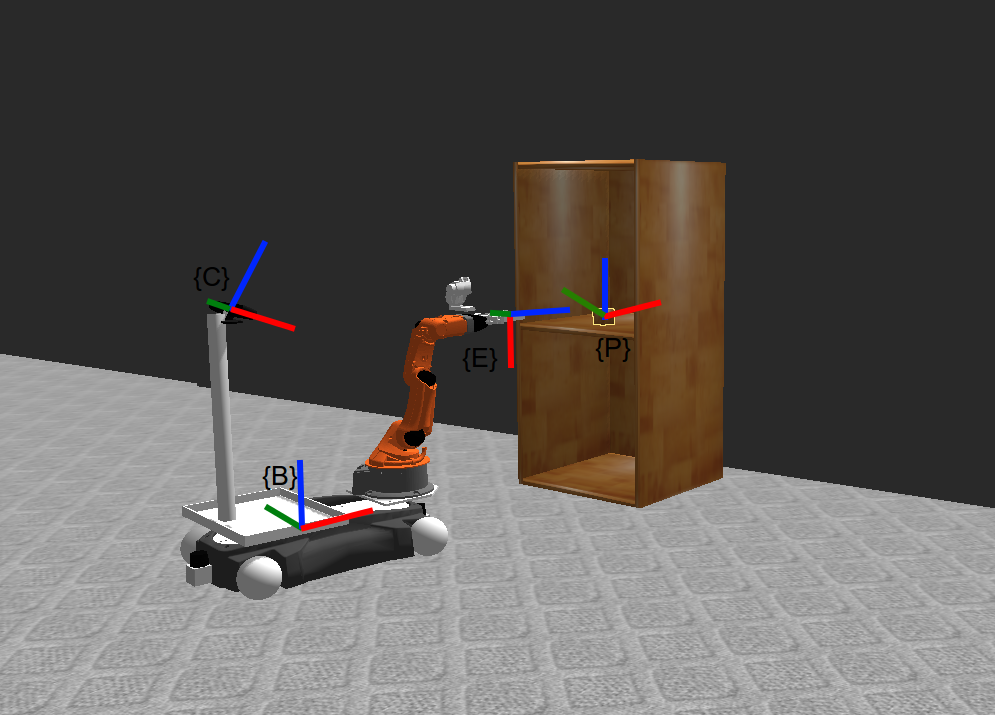

In [4]:
IPython.core.display.Image("images/youbot_and_package.png", embed=True)

Calculate $^{E}_PT$ by completing the following function.

In [5]:
def inverse_transform():
#this transform from P to C

    C = get_rotation_matrix_y_axis(np.radians(-28.647))
#print C
 
    translation_Matrix_P = np.array(([1.124,-0.060,0.473]))

    X =translation_Matrix_P[np.newaxis].T
    R1 = np.hstack((C,X))
    Q1 = np.vstack((R1,np.array([0.,0.,0.,1])))
  #  print 'from p to c'
   # print Q1   
    #print "****"


#we have transformation matrix from C to B


    C1 = get_rotation_matrix_y_axis(np.radians(28.647))

    translation_Matrix_CB = np.array(([-0.176,0.035,0.563]))
    X1 = translation_Matrix_CB[np.newaxis].T
    R2 = np.hstack((C1,X1))
    Q2 = np.vstack((R2,np.array([0.,0.,0.,1])))
   # print 'from c to b'   
   # print Q2
    #print "****"

    #we have transformation matrix from E to B
    
    C2 = get_rotation_matrix_y_axis(np.radians(90))
    translation_matrix_EB = np.array(([0.679,-0.019,0.445]))
    X2 =translation_matrix_EB[np.newaxis].T
    R3 = np.hstack((C2,X2))
    Q3 = np.vstack((R3,np.array([0.,0.,0.,1])))
    Q3 =np.around(Q3,decimals=3)
   # print 'E to B'
    #print Q3
   # print '*****'
    
    #This will give the inverse of E to B i.e, B to E
    inverse_Q3 = linalg.inv(Q3)
    #return inverse_Q3    #B to E
    #print 'from B to E'
    #print inverse_Q3
    
    #dot product
    result = np.dot(inverse_Q3,np.dot(Q2,Q1))
    result =np.around(result,decimals=3)
    return result
    
    
P_E_T = inverse_transform()
print "Transformation from P to E"
print "      "
print P_E_T
    

    

 

Transformation from P to E
      
[[-0.     0.    -1.     0.006]
 [ 0.     1.     0.    -0.006]
 [ 1.     0.     0.     0.358]
 [ 0.     0.     0.     1.   ]]


## Gimbal lock [10 points]

One of the problems with using fixed or Euler angles for rotations is the gimbal lock. Before moving on with the assignment, please read about the gimbal lock [here](https://en.wikipedia.org/wiki/Gimbal_lock#Gimbal_lock_in_applied_mathematics) and/or watch a video about it [here](https://www.youtube.com/watch?v=zc8b2Jo7mno).

In the code below, first complete the `rotate` function to rotate a point using fixed-angles and then rotate the point $p$ by two different sets of angles to illustrate the Gimbal lock. Based on what you've learned about the gimbal lock, explain what has happened and why.

In [6]:
# You can complete and use these helper functions if you want to
def get_rotation_matrix_z_axis(theta):
    '''Returns a rotation matrix for rotation
    about the Z axis by theta.
    '''
    A_B_R = np.array([[np.cos(theta),-np.sin(theta),0.],
                     [np.sin(theta),np.cos(theta),0.],
                     [0.,0.,1.]])
    return A_B_R

def get_rotation_matrix_y_axis(theta):
    '''Returns a rotation matrix for rotation
    about the Y axis by theta.
    '''
    A_B_R = np.array ([[np.cos(theta),0.,np.sin(theta)],
                      [0.,1.,0.],
                      [-np.sin(theta),0.,np.cos(theta)]])
    return A_B_R

def get_rotation_matrix_x_axis(theta):
    '''Returns a rotation matrix for rotation
    about the X axis by theta.
    '''
    A_B_R = np.array([[1.,0.,0.],
                      [0.,np.cos(theta),-np.sin(theta)],
                     [0.,np.sin(theta),np.cos(theta)]])
    return A_B_R


def rotate(p, alpha, beta, gamma):
    '''Rotates the point, p, by 
    gamma (about X), beta (about Y) and alpha (about Z) using fixed angles,
    and returns the rotated point.
 
    '''
    R =  get_rotation_matrix_z_axis(alpha)
    S = get_rotation_matrix_y_axis(beta)
    T = get_rotation_matrix_x_axis(gamma)
    a_rot = np.dot(T,S)
    b_rot = np.dot(R,a_rot)       #product of x and y rotation matrices
    a_rot_p = np.dot(a_rot,p)   #product of (x&y) and z rotation matrices
    
    return a_rot_p

p = np.array([1., 1., 1.])


#### Specify angles alpha1,... etc. to illustrate the Gimbal lock

### write your code here ###
alpha1 = np.radians(35)
beta1 = (np.radians(90))
gamma1 = (np.radians(55))
### your code ends here ###

p_a = rotate(p, alpha1, beta1, gamma1)
print p_a

### write your code here ###
alpha2 = np.radians (55)
beta2 =  np.radians (90)
gamma2 = np.radians (35)
### your code ends here ###

p_b = rotate(p, alpha2, beta2, gamma2)
print p_b

[ 1.          1.39272848  0.24557561]
[ 1.          1.39272848 -0.24557561]



1.Loss of an axis due to a rotation is called gimbal lock.
2.When there is a loss of axis,the object is rotated only in two axes.
3.

## Quaternions [10 points]

By representing rotation angles as [quaternions](http://run.usc.edu/cs520-s12/quaternions/quaternions-cs520.pdf), we are able to avoid the Gimbal lock problem. Show this in the code  below by using the same angles as in the fixed-angles exercise above. Note: the cell below use the scripts `eulerangles.py` and 'quaternion.py' that you received with the assignment.

In [7]:
from transformations import quaternion_from_euler
from quaternions import rotate_vector

p = np.array([1., 1., 1.])

### Specify angles alpha1,... etc. (same as above) to show that using quaternions 
### eliminates the Gimbal lock problem

alpha1 = np.radians(45)
beta1 = np.radians(90)
gamma1 = np.radians(65)


q1 = quaternion_from_euler(alpha1, beta1, gamma1)
p_a = rotate_vector(p, q1)
print p_a


alpha2 = np.radians(65)
beta2 = np.radians(90)
gamma2 = np.radians(45)


q2 = quaternion_from_euler(alpha2, beta2, gamma2)
p_b = rotate_vector(p, q2)
print p_b

[ 0.59767248  1.28171276 -1.        ]
[ 1.28171276  0.59767248 -1.        ]


transformations.py:1911: UserWarning: failed to import module _transformations
  warnings.warn("failed to import module %s" % name)


## Properties of a rotation matrix [10 points]

Write down and explain the properties of a rotation matrix below.

A rotation matrix is a matrix which rotates a given vector with respect to an angle(theta) about a fixed axis.It is operated on vectors to produce rotated vectors while the axis remains fixed.

Properties of rotation matrix are 
1.Rotation matrices preserves the length of the vectors
2.Rotation matrices preserves the angles
3.Columns of the rotation matrice are orthonormal
4.For any n-dimensional rotation matrix R acting on R^n,
    R^T = R^-1 and the determinant of the rotation matrix = +-1
    if the rotation is proper,then the determinant is +1 orelse it is -1












After specifying the mathematical properties of a rotation matrix, complete the following function to determine if a given matrix is a rotation matrix.

In [8]:
def rotation_matrix_aboutZ(theta):
    
    A_B_Z = np.array([[np.cos(theta),-np.sin(theta),0.],
                     [np.sin(theta),np.cos(theta),0.],
                     [0.,0.,1.]])

    return A_B_Z
    
def rotation_matrix_aboutY(theta):
    
    
    A_B_Y =  np.array ([[np.cos(theta),0.,np.sin(theta)],
                          [0.,1.,0.],
                          [-np.sin(theta),0.,np.cos(theta)]])
        
    return A_B_Y


def rotation_matrix_aboutX(theta):
    
    A_B_X = np.array([[1.,0.,0.],
                      [0.,np.cos(theta),-np.sin(theta)],
                     [0.,np.sin(theta),np.cos(theta)]])
    
    return A_B_X
  
#rotation matrices

A =rotation_matrix_aboutZ(np.radians(30))
B =rotation_matrix_aboutY(np.radians(30))
C =rotation_matrix_aboutX(np.radians(30))

#transpose of rotation matrices   
    
Q = np.transpose(A)
R =np.transpose(B)
S = np.transpose(C)

    
#product of rotation matrices and their transposes

A1= np.dot(Q,A)
A1= np.around(A1,decimals=3)
B1 = np.dot(R,B)
B1 = np.around(A1,decimals=3)
C1 = np.dot(S,C)
C1 = np.around(C1,decimals=3)
Identity_matrix = np.eye(3)
I =Identity_matrix
    
#print A1
#print B1
#print C1

def is_rotation_matrix(matrix): 
    G = matrix.all() == I.all()
    return G

#returns true if rotation matrix and its transpose about z axis=identity matrix   
U = is_rotation_matrix(A1) 
print U
#returns true if rotation matrix and its transpose about y axis=identity matrix
V = is_rotation_matrix(B1)
print V
#returns true if rotation matrix and its transpose about x axis=identity matrix
W = is_rotation_matrix(C1)
print W

True
True
True


# Read the course rules on LEA for submission details

